In [83]:
import matplotlib.pyplot as plt
import numpy as np

In [84]:
# Set seed for reproducibility
np.random.seed(42)

In [85]:

# Generate synthetic hourly load data for one year (8760 hours)
base_load = np.random.normal(loc=75, scale=10, size=8760)  # Mean load of 75 GW
base_load = np.clip(base_load, 40, None)  # No loads below 40 GW

In [ ]:
# ----------- Adjust Scenarios
dc_addition = 6  # GW
vpp_capacity = 6  # GW

In [87]:
# ----------- Scenario 1: Add data center load uniformly
load_dc = base_load + dc_addition

In [88]:
# ----------- Scenario 2: Simulate VPPs as peak shaving and valley filling
load_vpp = load_dc.copy()
sorted_indices = np.argsort(load_vpp)  # Sort indices by load (ascending)
n_hours = len(load_vpp)

# Define shave and fill hours (top/bottom 15%)
n_shift = int(0.15 * n_hours)
shave_hours = sorted_indices[-n_shift:]  # Highest load hours
fill_hours = sorted_indices[:n_shift]   # Lowest load hours

# Energy to shift = vpp_capacity * hours shifted
energy_shift = vpp_capacity * n_shift

# Subtract VPPs from peak hours
load_vpp[shave_hours] -= vpp_capacity

# Add back energy in valley hours (proportional or equal)
load_vpp[fill_hours] += vpp_capacity

In [ ]:
# ----------- Scenario 3: Both data centers and VPPs
# load_both = load_dc.copy()
load_both = base_load + dc_addition + vpp_capacity
load_both[shave_hours] -= vpp_capacity
load_both[fill_hours] += vpp_capacity
no_flex_both = base_load + dc_addition + vpp_capacity

# --- Create LDCs ---
original_ldc = np.sort(base_load)[::-1]
ldc_dc = np.sort(load_dc)[::-1]
ldc_vpp = np.sort(load_vpp)[::-1]
ldc_both = np.sort(load_both)[::-1]
ldc_no_flex = np.sort(no_flex_both)[::-1]

avail_capacity = np.full(8760, 120)

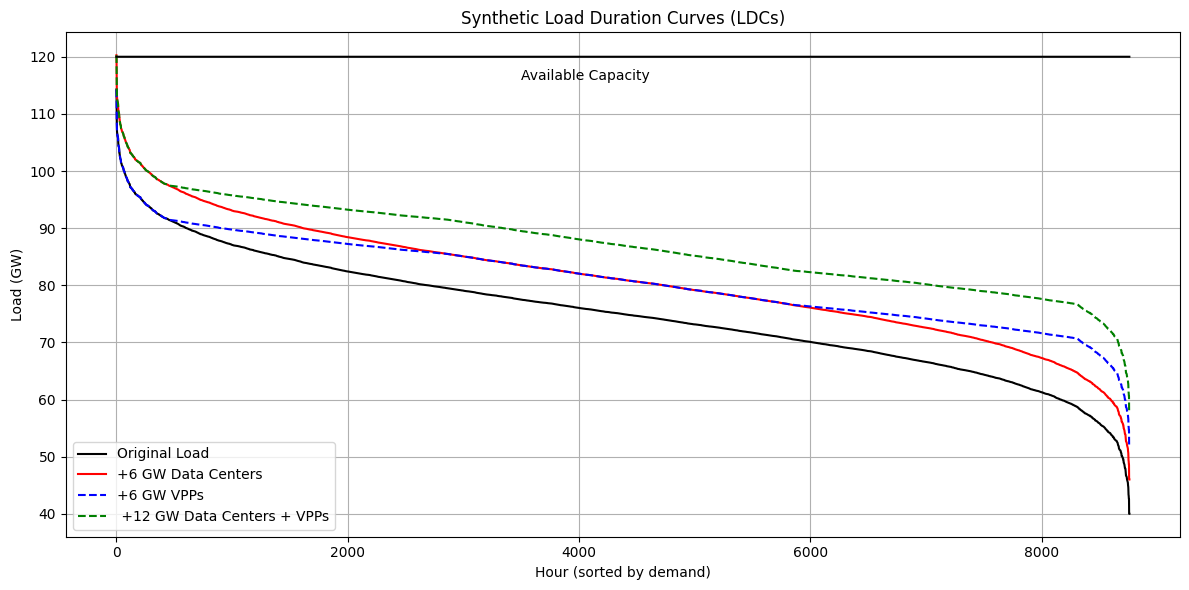

In [90]:

# --- Plotting ---
plt.figure(figsize=(12, 6))
plt.plot(original_ldc, color='black', label='Original Load')
plt.plot(ldc_dc, 'r', label='+6 GW Data Centers')
plt.plot(ldc_vpp, 'b--', label='+6 GW VPPs')
plt.plot(ldc_both, 'g--', label=' +12 GW Data Centers + VPPs')
# plt.plot(ldc_no_flex, 'y--', label='+12 GW (No Flex)')

plt.plot(avail_capacity, 'black')
plt.annotate('Available Capacity', xy=(3500, 116))

plt.title('Synthetic Load Duration Curves (LDCs)')
plt.xlabel('Hour (sorted by demand)')
plt.ylabel('Load (GW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
